In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [13]:
image_list = []
for folder in os.listdir("."):
    if os.path.isdir(folder):
        for filename in os.listdir(folder):
            if filename.endswith("png") and "flip" not in filename:
                print os.path.join(folder,filename)
                image = np.asarray(Image.open(os.path.join(folder,filename) ) )
                flip_image = np.fliplr(image)
                result = Image.fromarray(flip_image.astype(np.uint8) )
                result.save(os.path.join(folder, filename.split(".")[0] + "_flip.png") )
                image_list.append(image)
print len(image_list)

# image_list = image_list[:-3]

apple\1.png
apple\2.png
apple\sprCherry_strip2.png
boss\deming.png
boss\huaji.png
cat\cat.png
falling\1.png
falling\2.png
falling\sprPlayerFall_strip2.png
floor\sprfloor.png
Idle\1.png
Idle\2.png
Idle\3.png
Idle\4.png
Idle\sprPlayerIdle_strip4.png
jump\1.png
jump\2.png
jump\sprPlayerJump_strip2.png
Running\1.png
Running\2.png
Running\3.png
Running\4.png
Running\sprPlayerRunning_strip4.png
spur\sprSpike.png
spur\sprSpikeLeft.png
spur\sprSpikeRight.png
spur\sprSpikeUp.png
Title\final_grade.png
Title\gameover.png
Title\save1.png
Title\save2.png
Title\sprGAMEOVER.png
Title\sprWarp.png
welcome\cover1.png
welcome\cover2.png
welcome\cover3.png
36


In [14]:
new_colors = []
colors = []
for i in range(len(image_list)):
    img = image_list[i]
#     print i
    for x in range(img.shape[0]):
#         print x
        for y in range(img.shape[1]):
            color = ([img[x,y,0], img[x,y,1], img[x,y,2] ] )
            if color not in new_colors:
                new_colors.append(color)
    try:
        new_colors = eliminate_colors(new_colors)
    except:
        print len(new_colors)
        exit(1)
# print len(colors)
# print colors

In [15]:
new_colors = eliminate_colors(new_colors)
print len(new_colors)

207


In [12]:
def eliminate_colors(colors):
    distance = cdist(colors,colors)
    keep_list = []
    fail_list = []
    for i in range(distance.shape[0]):
        distance[i,i] = np.inf
        for j in range(distance.shape[1]):
            if distance[i,j] <= 13:
                if j not in fail_list:
                    fail_list.append(j)
        if i not in fail_list:
            keep_list.append(i)
    new_colors = np.zeros((len(keep_list),3) )
    for i, idx in enumerate(keep_list):
        new_colors[i,0] = colors[idx][0]
        new_colors[i,1] = colors[idx][1]
        new_colors[i,2] = colors[idx][2]
    return new_colors.tolist()

In [30]:
import json
with open("new_colors.json","w") as f:
    json.dump(new_colors, f)

TypeError: array([[  64.,  128.,    0.],
       [   8.,    0.,    0.],
       [ 100.,    0.,    0.],
       [ 243.,    0.,    0.],
       [ 243.,   91.,   91.],
       [  20.,   20.,   20.],
       [  38.,   38.,   38.],
       [ 199.,  199.,  199.],
       [ 227.,  227.,  227.],
       [ 237.,  237.,  237.],
       [ 172.,  172.,  172.],
       [ 159.,  159.,  159.],
       [ 139.,  139.,  139.],
       [ 129.,  129.,  129.],
       [ 107.,  107.,  107.],
       [  96.,   96.,   96.],
       [  84.,   84.,   84.],
       [  69.,   69.,   69.],
       [  55.,   55.,   55.],
       [ 252.,  211.,  212.],
       [ 250.,  193.,  195.],
       [ 252.,  221.,  222.],
       [ 248.,  164.,  167.],
       [ 243.,  101.,  106.],
       [ 240.,   71.,   77.],
       [ 246.,  146.,  150.],
       [ 244.,  124.,  128.],
       [ 238.,   39.,   46.],
       [ 237.,   26.,   34.],
       [ 255.,  255.,  255.],
       [ 254.,  248.,  233.],
       [ 254.,  242.,  215.],
       [ 252.,  235.,  193.],
       [ 252.,  229.,  175.],
       [ 251.,  222.,  151.],
       [ 250.,  214.,  129.],
       [ 249.,  208.,  109.],
       [ 248.,  201.,   87.],
       [ 223.,  181.,   67.],
       [ 174.,  135.,   47.],
       [ 130.,  102.,   36.],
       [  90.,   71.,   26.],
       [  61.,   49.,   18.],
       [  41.,   34.,   12.],
       [  30.,   26.,   10.],
       [ 106.,   88.,   35.],
       [ 163.,  138.,   58.],
       [ 195.,  166.,   70.],
       [ 185.,  149.,   56.],
       [ 121.,  121.,  120.],
       [  46.,   46.,   45.],
       [ 181.,  160.,   72.],
       [ 211.,  210.,  210.],
       [ 187.,  187.,  187.],
       [ 210.,  192.,   93.],
       [ 235.,  193.,  115.],
       [ 159.,  146.,   71.],
       [ 232.,  219.,  192.],
       [ 105.,  100.,   85.],
       [ 217.,  206.,  102.],
       [ 169.,  136.,   73.],
       [ 210.,  197.,  169.],
       [ 163.,  144.,  111.],
       [ 132.,  125.,  108.],
       [ 195.,  150.,   75.],
       [ 217.,  169.,   88.],
       [ 236.,  164.,   40.],
       [ 229.,  116.,   36.],
       [ 211.,   67.,   34.],
       [ 224.,  102.,   36.],
       [ 195.,   17.,   33.],
       [ 237.,  136.,   35.],
       [ 255.,   18.,   17.],
       [ 229.,   16.,   15.],
       [  38.,    3.,    3.],
       [  71.,   60.,   44.],
       [  54.,   45.,   33.],
       [ 181.,  152.,  111.],
       [ 100.,   83.,   61.],
       [ 210.,   15.,   14.],
       [ 193.,   17.,   15.],
       [  69.,   34.,   25.],
       [ 197.,  164.,  120.],
       [ 128.,  106.,   78.],
       [ 147.,   11.,   10.],
       [ 236.,  196.,  144.],
       [ 255.,  168.,  247.],
       [ 217.,  180.,  133.],
       [ 255.,   74.,   15.],
       [ 255.,  144.,   12.],
       [ 249.,  135.,  231.],
       [ 239.,   89.,  192.],
       [ 243.,  108.,  208.],
       [ 255.,  171.,   11.],
       [ 236.,   73.,  179.],
       [ 137.,   68.,    7.],
       [ 137.,   93.,    6.],
       [ 237.,  154.,  237.],
       [  77.,   50.,   77.],
       [  47.,   31.,   47.],
       [ 178.,  116.,  178.],
       [  35.,   23.,   35.],
       [ 159.,  104.,  159.],
       [ 255.,  194.,   10.],
       [ 255.,  227.,    9.],
       [  91.,   59.,   91.],
       [  96.,   77.,   96.],
       [ 118.,   71.,  114.],
       [ 255.,  255.,    8.],
       [ 194.,  125.,  194.],
       [ 151.,  149.,  151.],
       [ 137.,  116.,    5.],
       [ 131.,   85.,  131.],
       [ 137.,  137.,    4.],
       [ 145.,   98.,  145.],
       [ 158.,  121.,  121.],
       [ 158.,  133.,   96.],
       [ 191.,  255.,    9.],
       [ 110.,  255.,   11.],
       [ 224.,  255.,    9.],
       [ 173.,  255.,   10.],
       [  70.,  255.,   12.],
       [ 137.,  255.,   11.],
       [ 108.,  152.,    6.],
       [  90.,   88.,    3.],
       [  49.,   49.,    2.],
       [  26.,   95.,    4.],
       [  69.,  237.,   11.],
       [  41.,  140.,    7.],
       [  36.,  123.,    6.],
       [  14.,   47.,    2.],
       [  64.,  220.,   10.],
       [   9.,   31.,    1.],
       [  65.,  242.,   50.],
       [  53.,  225.,   97.],
       [  70.,  249.,   30.],
       [  49.,  165.,    8.],
       [  50.,  150.,   15.],
       [  60.,   73.,   55.],
       [  48.,  219.,  120.],
       [  15.,  174.,  253.],
       [  19.,  179.,  237.],
       [  62.,  238.,   63.],
       [  32.,  197.,  185.],
       [  39.,  207.,  155.],
       [  29.,  135.,   79.],
       [ 205.,  167.,  169.],
       [ 173.,  142.,  144.],
       [ 122.,   97.,   99.],
       [   9.,  109.,  158.],
       [ 230.,  166.,  168.],
       [ 147.,   96.,   98.],
       [  11.,  130.,  189.],
       [   5.,   58.,   84.],
       [  30.,   70.,   90.],
       [   3.,   35.,   51.],
       [   8.,   94.,  135.],
       [  25.,  164.,  255.],
       [  36.,  152.,  255.],
       [  12.,  143.,  209.],
       [   4.,   44.,   63.],
       [  11.,  122.,  178.],
       [ 218.,  147.,  149.],
       [ 202.,  131.,  133.],
       [ 128.,   84.,   86.],
       [  58.,  130.,  255.],
       [ 112.,   74.,  255.],
       [  14.,  164.,  238.],
       [  56.,   46.,  137.],
       [ 141.,  118.,   87.],
       [  58.,   34.,  124.],
       [ 139.,   80.,  255.],
       [  90.,   39.,   18.],
       [ 255.,  199.,  143.],
       [ 171.,    0.,    0.],
       [  17.,   26.,  143.],
       [  63.,    6.,    6.],
       [  21.,   66.,  105.],
       [  77.,  224.,   19.],
       [  52.,  188.,    0.],
       [ 106.,   80.,   16.],
       [ 214.,  202.,  190.],
       [ 195.,  215.,  247.],
       [   0.,  192.,  192.],
       [   0.,  162.,  232.],
       [ 194.,   98.,  187.],
       [ 153.,   77.,  148.],
       [  58.,   28.,   54.],
       [ 209.,  106.,  203.],
       [ 184.,   93.,  177.],
       [ 102.,   51.,   98.],
       [ 244.,  124.,  238.],
       [ 223.,  113.,  217.],
       [ 254.,  255.,  133.],
       [ 151.,  145.,   37.],
       [ 255.,   85.,   85.],
       [ 105.,  255.,   85.],
       [  30.,  255.,    0.],
       [  21.,  182.,    0.],
       [   2.,   25.,  100.],
       [ 165.,   83.,  159.],
       [ 249.,  177.,  180.],
       [ 240.,   60.,   67.],
       [ 255.,    5.,    5.],
       [ 255.,   48.,   48.],
       [ 255.,   34.,   34.],
       [ 255.,   68.,   68.]]) is not JSON serializable

Idle\1_flip.png
Idle\1.png
2048
Running\1_flip.png
Running\1.png
4096
Running\2_flip.png
Running\2.png
6144
jump\1_flip.png
jump\1.png
8192
jump\2_flip.png
jump\2.png
10240
falling\1_flip.png
falling\1.png
12288
falling\2_flip.png
falling\2.png
14336
spur\sprSpikeUp.png
15360
apple\1.png
16384
apple\2.png
17408
spur\SprSpike.png
18432
cat\cat_flip.png
60352
boss\huaji.png
76736
Title\sprWarp.png
77760
Title\gameover.png
241600
Title\save1.png
242624
Title\save2.png
243648
welcome\cover1.png
550848
welcome\cover2.png
858048
welcome\cover3.png
1165248
floor\sprfloor.png
1166272
letters\A.png
1223872
letters\B.png
1281472
letters\C.png
1339072
letters\D.png
1396672
letters\E.png
1454272
letters\F.png
1511872
Title\final_grade.png
1819072
boss\deming.png
2126272
block\block2.png
2127296


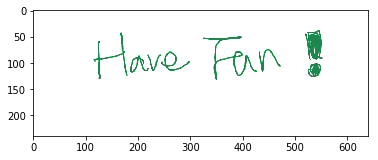

Title\have_fun.png
2280896


In [33]:
folder_names = [("Idle",1, True),("Running",2, True),("jump",2, True),("falling",2, True),
                ("spur","sprSpikeUp", False),("apple",2,False),("spur","SprSpike", False), 
                ("cat", "cat_flip", False), ("boss","huaji", False), ("Title","sprWarp", False),
               ("Title","gameover", False),("Title","save1", False), ("Title","save2", False),
               ("welcome","cover1",False), ("welcome","cover2",False), ("welcome","cover3",False), ("floor","sprfloor",False),
               ("letters","A",False),("letters","B",False),("letters","C",False),("letters","D",False),
               ("letters","E",False),("letters","F",False), ("Title", "final_grade",False),
               ("boss", "deming", False), ("block", "block2", False), ("Title","have_fun",False)]
writeFile(None)
count = 0
for folder, idx, flip in folder_names:
    if type(idx) is int:
        for i in range(1,idx+1):
            filename = os.path.join(folder,str(i)+".png")
            image_idx = image2idx(filename)
            if len(image_idx) < 1024:
                image_idx = image_idx.tolist() + [0 for temp in range(1024 - len(image_idx))]
            count += len(image_idx)
            if flip:
                filename_f = os.path.join(folder, str(i)+"_flip.png")
                image_idx_f = image2idx(filename_f)
                count += len(image_idx_f)
                writeFile(image_idx_f.astype(np.uint8) )
                print filename_f
            writeFile(image_idx)
            print filename
            print count
    else:
        filename = os.path.join(folder, idx+".png")
        image_idx = image2idx(filename)
#         if idx == "sprfloor":
#             print len(image_idx.tolist())
        count += len(image_idx)
        writeFile(image_idx.astype(np.uint8) )
        print filename
        print count

In [32]:
def image2idx(filename):
    img = np.asarray(Image.open(filename) )
#     new_img = np.zeros(img.shape)
    new_img = np.zeros((img.shape[0],img.shape[1], 3))
    image_idx = np.zeros(img.shape[0]*img.shape[1])
    count = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            temp = img[i,j]
            if len(temp) > 3 and temp[3] == 0:
                temp = [255,255,255]
            elif len(temp) > 3:
                temp = temp[:-1]
            min_list = cdist([temp], new_colors)
            min_idx = np.argmin(min_list)
            
            image_idx[count] = min_idx
#             new_img[i,j] = new_colors[int(image_idx[count]) ]
            new_img[i,j] = new_colors[min_idx]
            count += 1
    if("have_fun" in filename):
        plt.imshow(new_img.astype(np.uint8) )
        plt.show()
    return np.asarray(image_idx).astype(np.uint8)

# print img.shape
# plt.imshow(img)
# plt.show()
# im = Image.fromarray(np.uint8(new_img) )
# plt.imshow(im)
# plt.show()

In [20]:
# get palette
new_colors = np.asarray(new_colors)

for i in range(0,len(new_colors)):
    print "8'd{0}: begin VGA_R <= 8'd{1}; VGA_G <= 8'd{2}; VGA_B <= 8'd{3}; end".format(i,int(new_colors[i,0]), int(new_colors[i,1]), int(new_colors[i,2]) )

8'd0: begin VGA_R <= 8'd64; VGA_G <= 8'd128; VGA_B <= 8'd0; end
8'd1: begin VGA_R <= 8'd8; VGA_G <= 8'd0; VGA_B <= 8'd0; end
8'd2: begin VGA_R <= 8'd100; VGA_G <= 8'd0; VGA_B <= 8'd0; end
8'd3: begin VGA_R <= 8'd243; VGA_G <= 8'd0; VGA_B <= 8'd0; end
8'd4: begin VGA_R <= 8'd243; VGA_G <= 8'd91; VGA_B <= 8'd91; end
8'd5: begin VGA_R <= 8'd20; VGA_G <= 8'd20; VGA_B <= 8'd20; end
8'd6: begin VGA_R <= 8'd38; VGA_G <= 8'd38; VGA_B <= 8'd38; end
8'd7: begin VGA_R <= 8'd199; VGA_G <= 8'd199; VGA_B <= 8'd199; end
8'd8: begin VGA_R <= 8'd227; VGA_G <= 8'd227; VGA_B <= 8'd227; end
8'd9: begin VGA_R <= 8'd237; VGA_G <= 8'd237; VGA_B <= 8'd237; end
8'd10: begin VGA_R <= 8'd172; VGA_G <= 8'd172; VGA_B <= 8'd172; end
8'd11: begin VGA_R <= 8'd159; VGA_G <= 8'd159; VGA_B <= 8'd159; end
8'd12: begin VGA_R <= 8'd139; VGA_G <= 8'd139; VGA_B <= 8'd139; end
8'd13: begin VGA_R <= 8'd129; VGA_G <= 8'd129; VGA_B <= 8'd129; end
8'd14: begin VGA_R <= 8'd107; VGA_G <= 8'd107; VGA_B <= 8'd107; end
8'd15: begin VG

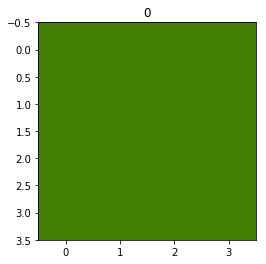

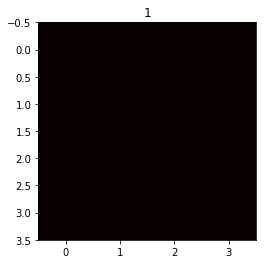

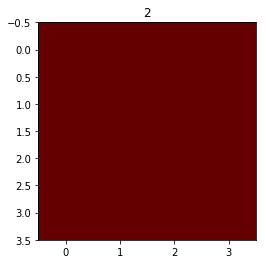

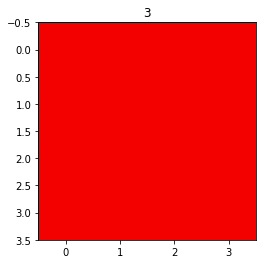

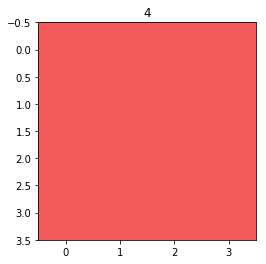

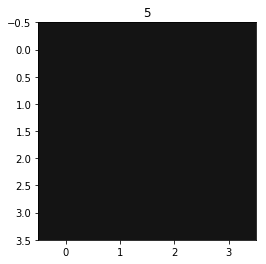

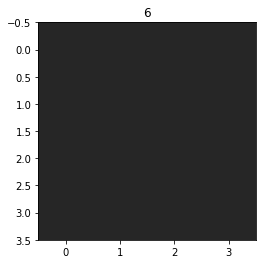

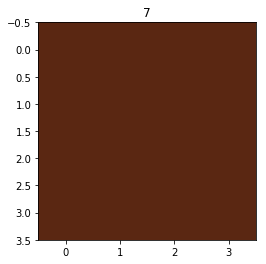

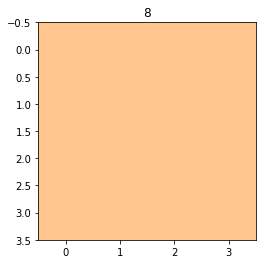

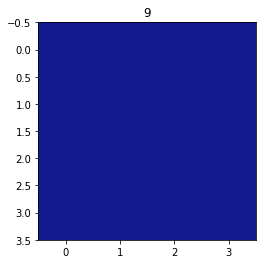

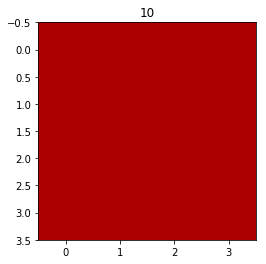

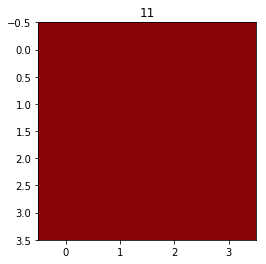

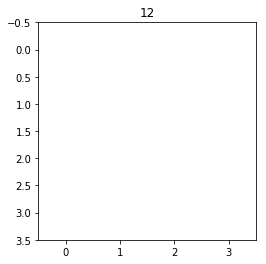

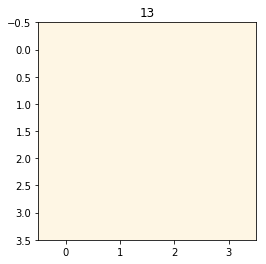

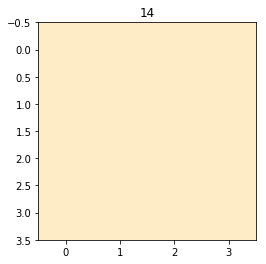

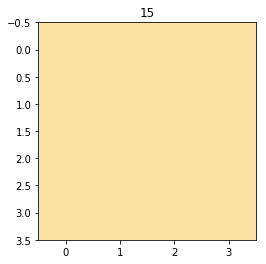

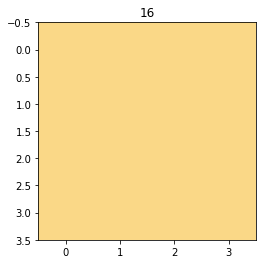

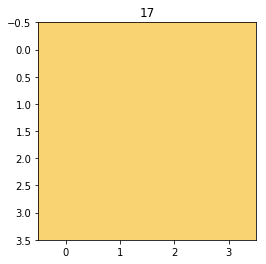

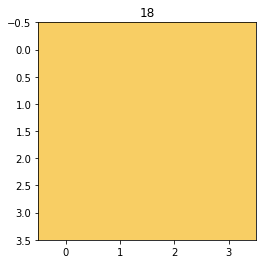

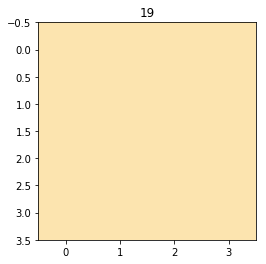

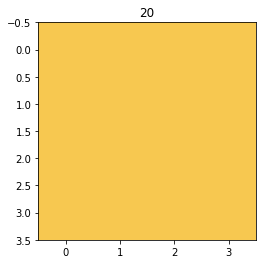

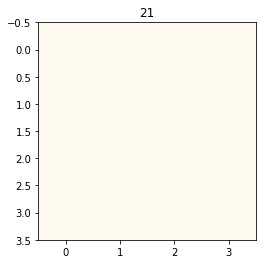

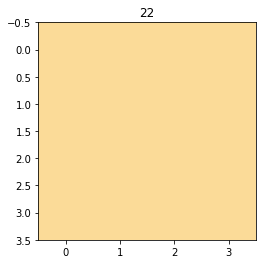

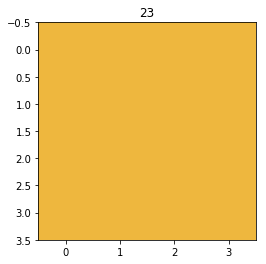

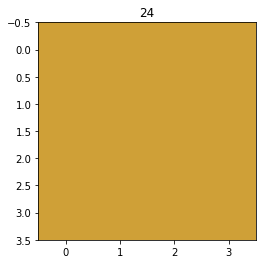

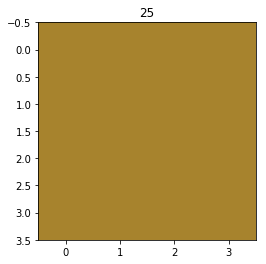

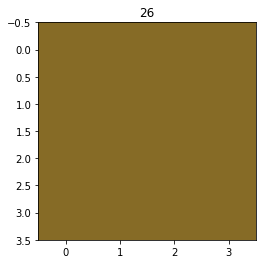

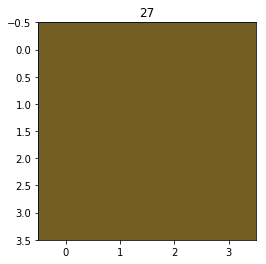

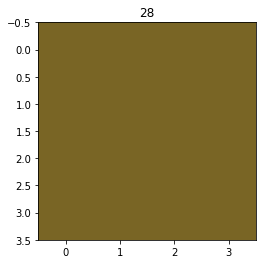

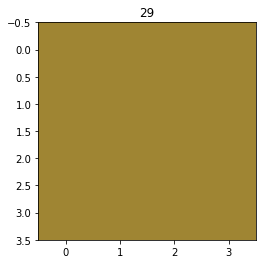

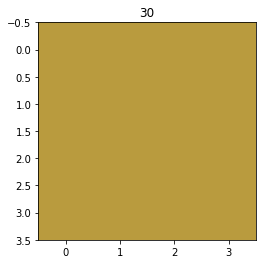

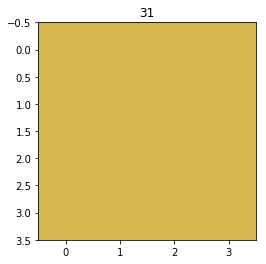

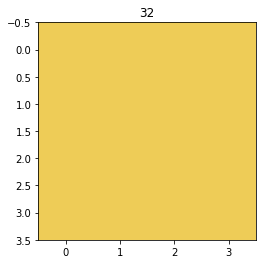

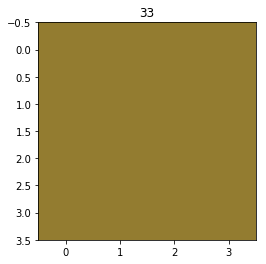

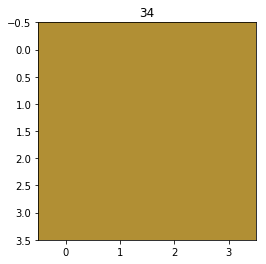

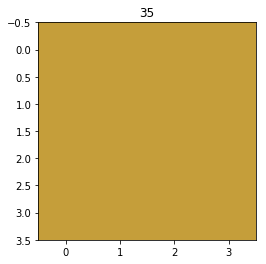

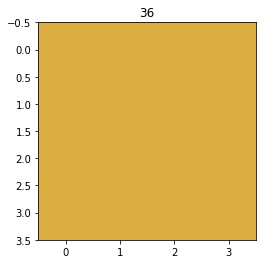

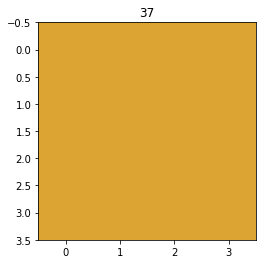

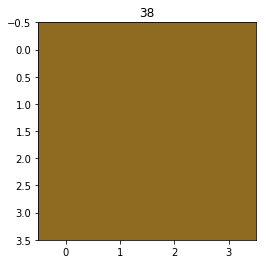

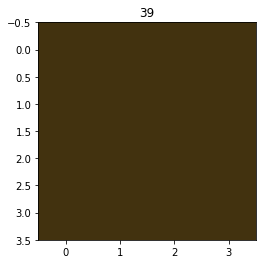

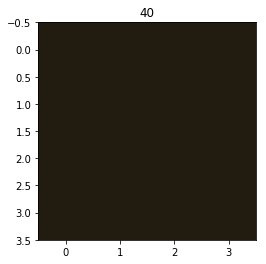

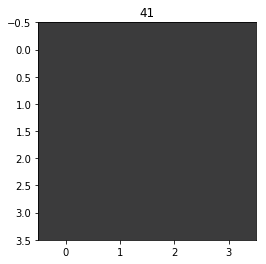

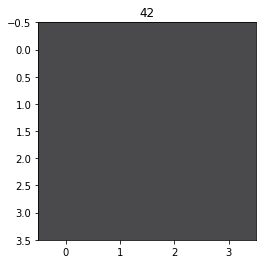

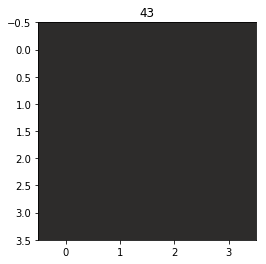

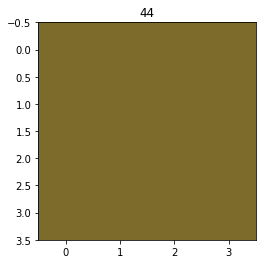

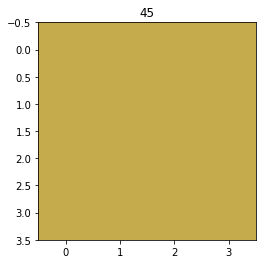

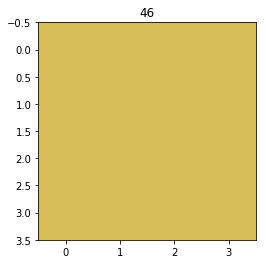

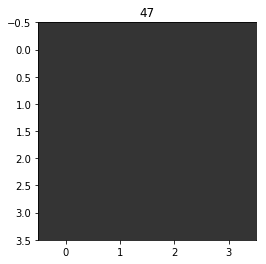

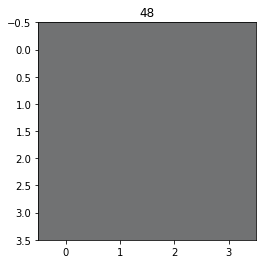

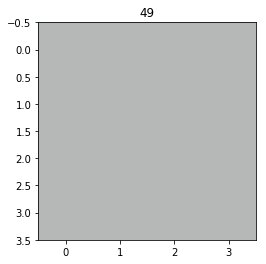

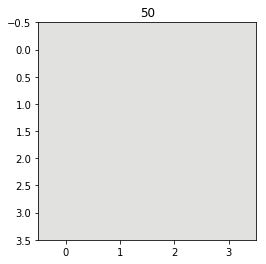

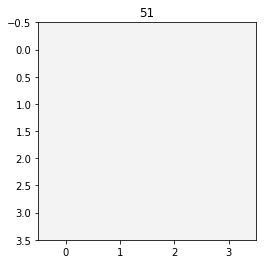

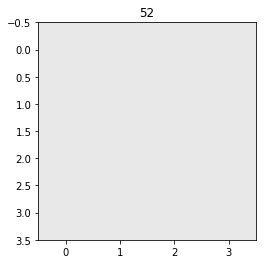

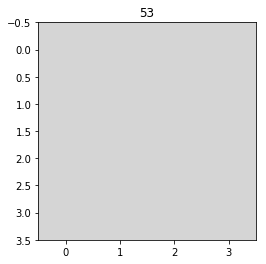

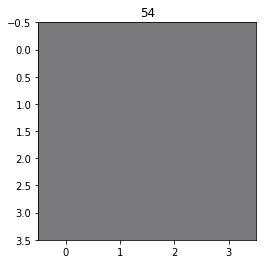

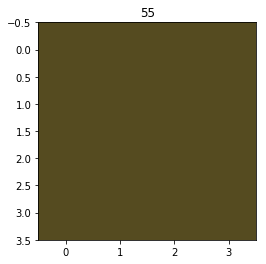

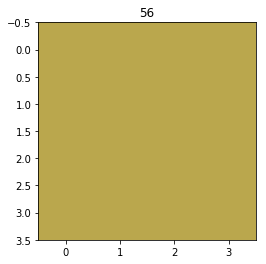

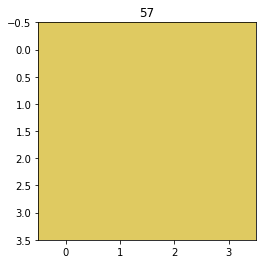

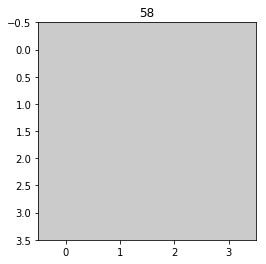

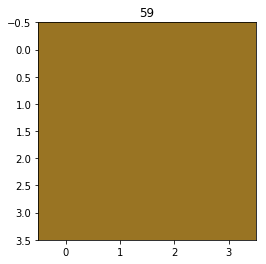

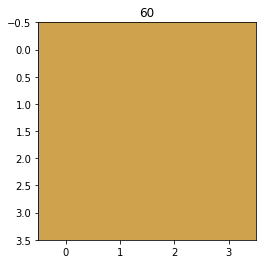

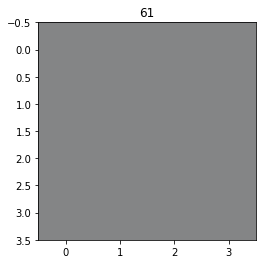

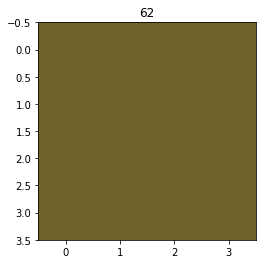

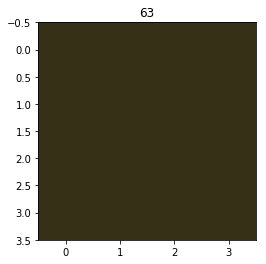

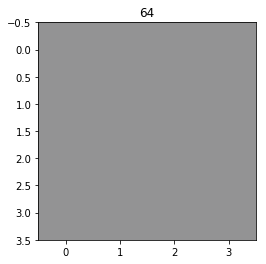

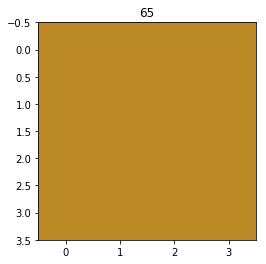

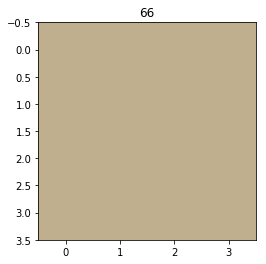

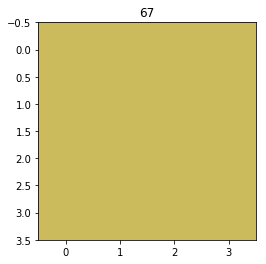

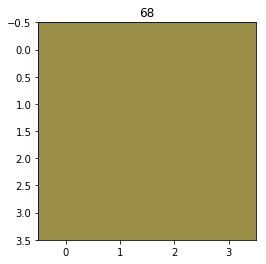

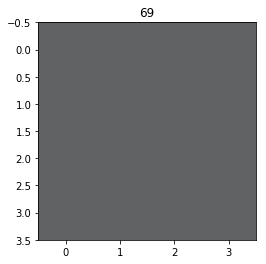

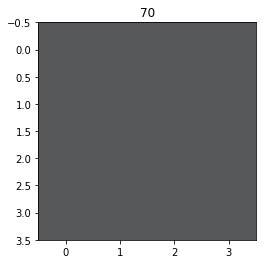

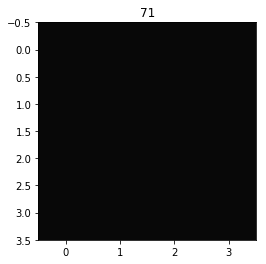

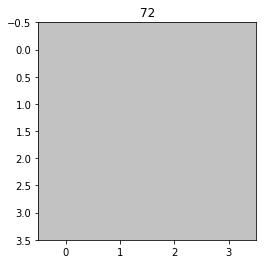

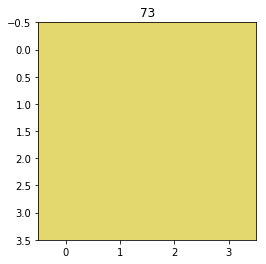

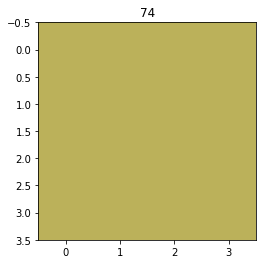

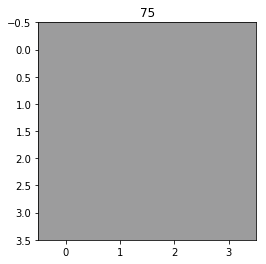

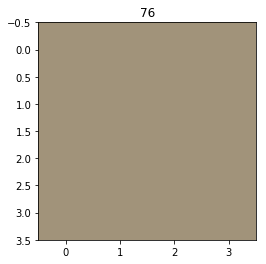

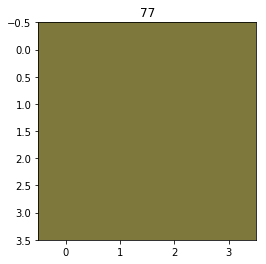

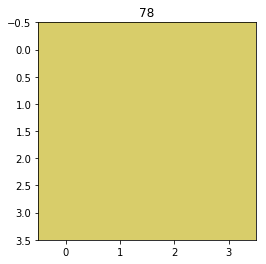

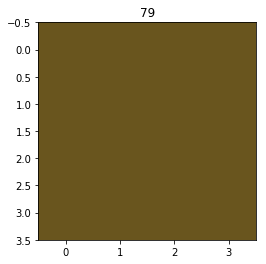

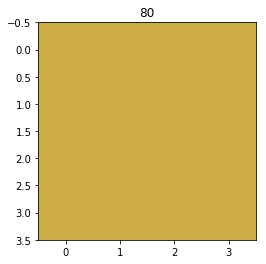

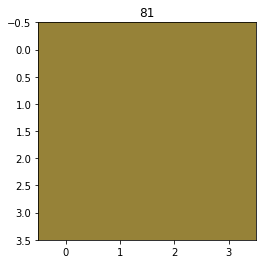

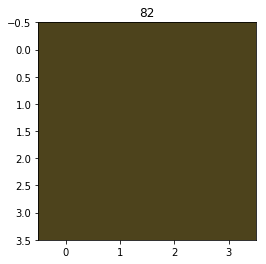

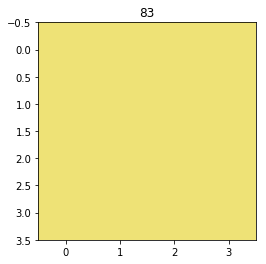

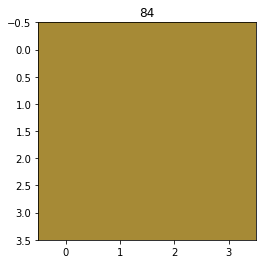

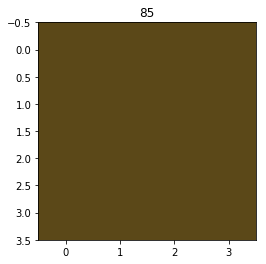

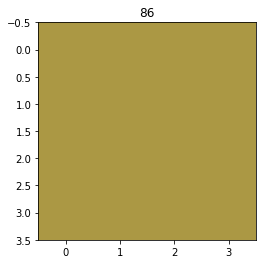

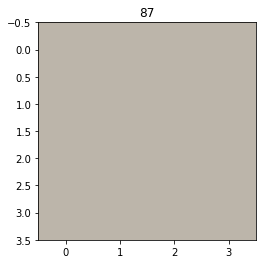

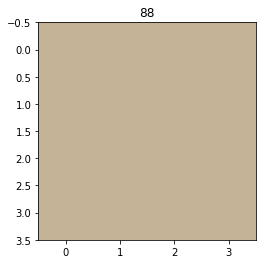

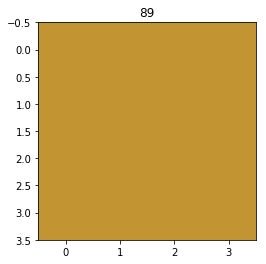

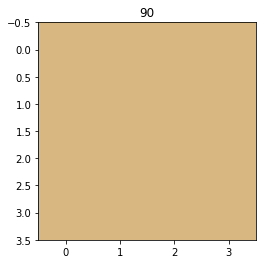

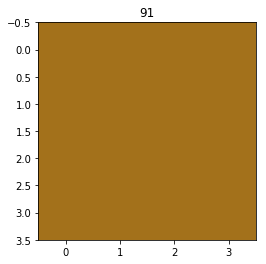

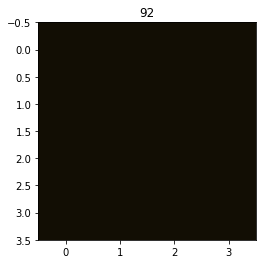

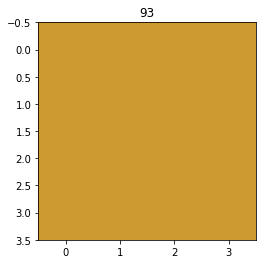

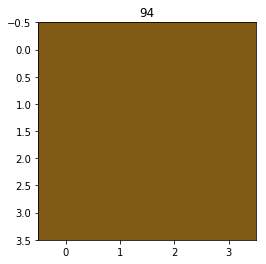

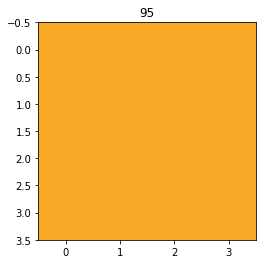

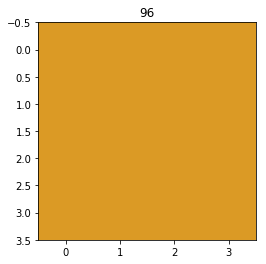

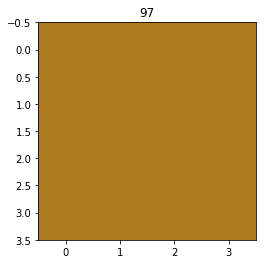

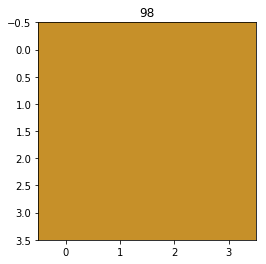

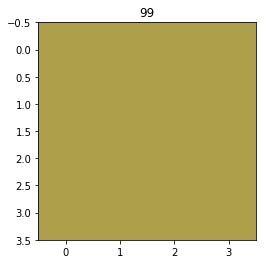

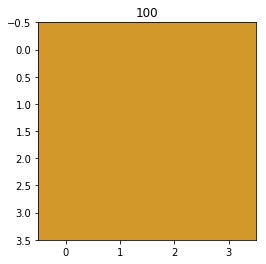

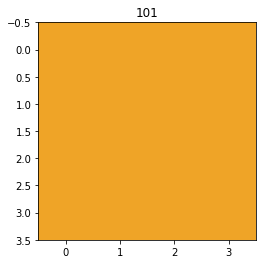

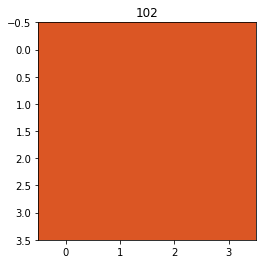

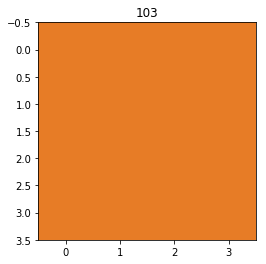

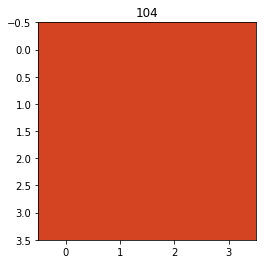

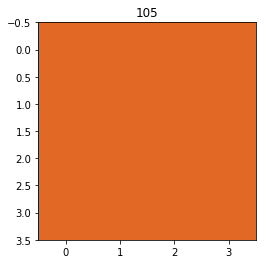

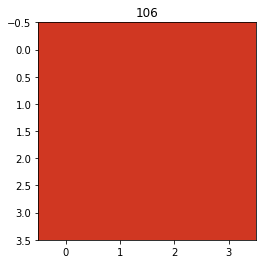

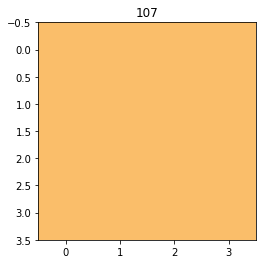

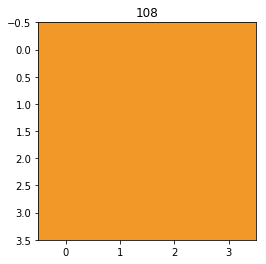

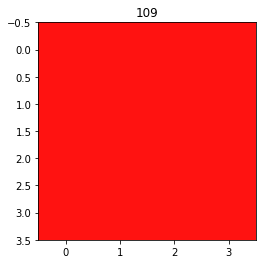

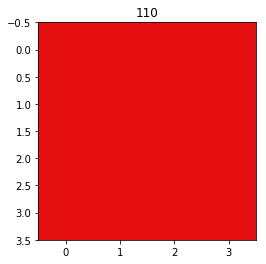

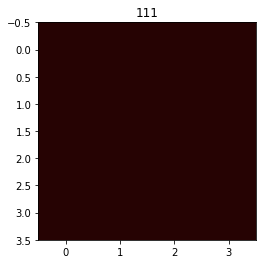

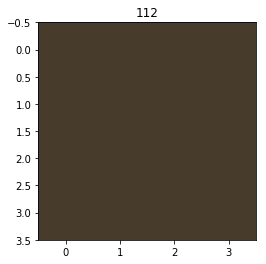

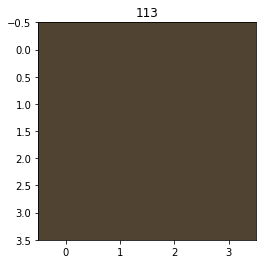

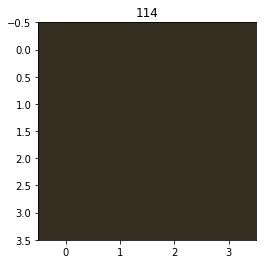

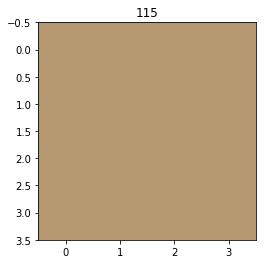

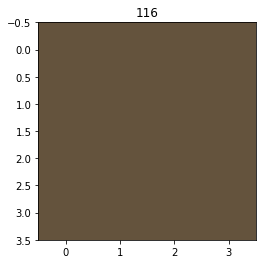

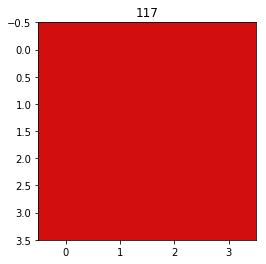

KeyboardInterrupt: 

In [127]:
for idx, color in enumerate(new_colors):
    temp = np.zeros((4,4,3))
    for i in range(4):
        for j in range(4):
            temp[i,j] = color
    plt.title(str(idx))
    plt.imshow(np.uint8(temp))
    plt.show()

In [128]:
def append_color():
    with open("image.txt", "a") as f:
        for i in range(1024):
            f.write("0x00\n")
            f.write(hex(184)+"\n")

In [6]:
# change image's pixel values to palette idx values
def writeFile(image_idx):
# print image_idx.shape
    if image_idx is None:
        with open("backgroundSeperate.ram", "wb") as f:
            f.write("")
        with open("image.txt","w") as f:
            f.write("")
        return
    with open("backgroundSeperate.ram","ab") as f:
        for num, i in enumerate(image_idx):
            temp = np.uint32(i & 0xff)  
            f.write(temp)
    with open("image.txt", "a") as f:
        for num, i in enumerate(image_idx):
            temp = np.uint16(int(i))
            f.write("0\n")
            f.write(str(temp)+"\n")

In [5]:
with open("image.txt", "w") as f:
    for i in range(1024):
        temp = np.uint16(i)
#         f.write("0x00\n")
        f.write(hex(temp)+'\n')

(32L, 32L, 4L)


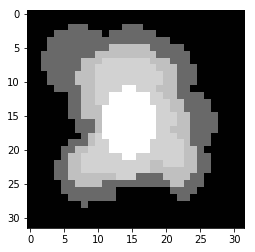

(128L, 128L, 4L)


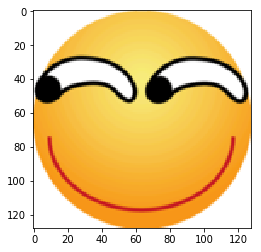

(32L, 32L, 4L)


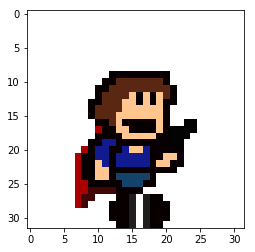

(32L, 32L, 4L)


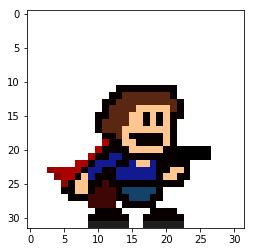

In [14]:
f_list = ["Title/sprWarp.png", "boss/huaji.png", "jump/1.png","Idle/1.png"]
# f_list = ["apple/1.png"]
for f in f_list:
    img = np.asarray(Image.open(f) )
    print img.shape
    plt.imshow(img[:,:])
    plt.show()